In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

In [4]:
df = pd.read_csv("kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(158, 26)

In [8]:
df.drop('id', axis = 1, inplace = True)

In [9]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [10]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,60.0,2.7,131.0,4.2,10.8,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,90.0,4.1,130.0,6.4,5.6,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,148.0,3.9,135.0,5.2,7.7,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd


In [11]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,49.563291,74.050633,1.019873,0.797468,0.253165,131.341772,52.575949,2.188608,138.848101,4.636709,13.687342
std,15.512244,11.175381,0.005499,1.413130,0.813397,64.939832,47.395382,3.077615,7.489421,3.476351,2.882204
min,6.000000,50.000000,1.005000,0.000000,0.000000,70.000000,10.000000,0.400000,111.000000,2.500000,3.100000
25%,39.250000,60.000000,1.020000,0.000000,0.000000,97.000000,26.000000,0.700000,135.000000,3.700000,12.600000
50%,50.500000,80.000000,1.020000,0.000000,0.000000,115.500000,39.500000,1.100000,139.000000,4.500000,14.250000
75%,60.000000,80.000000,1.025000,1.000000,0.000000,131.750000,49.750000,1.600000,144.000000,4.900000,15.775000
max,83.000000,110.000000,1.025000,4.000000,5.000000,490.000000,309.000000,15.200000,150.000000,47.000000,17.800000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 3 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      158 non-null    float64
 1   blood_pressure           158 non-null    float64
 2   specific_gravity         158 non-null    float64
 3   albumin                  158 non-null    float64
 4   sugar                    158 non-null    float64
 5   red_blood_cells          158 non-null    object 
 6   pus_cell                 158 non-null    object 
 7   pus_cell_clumps          158 non-null    object 
 8   bacteria                 158 non-null    object 
 9   blood_glucose_random     158 non-null    float64
 10  blood_urea               158 non-null    float64
 11  serum_creatinine         158 non-null    float64
 12  sodium                   158 non-null    float64
 13  potassium                158 non-null    float64
 14  haemoglobin              158 no

#As we can see that 'packed_cell_volume', 'white_blood_cell_count' and 'red_blood_cell_count' are object type. We need to change them to numerical dtype.

In [13]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 3 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      158 non-null    float64
 1   blood_pressure           158 non-null    float64
 2   specific_gravity         158 non-null    float64
 3   albumin                  158 non-null    float64
 4   sugar                    158 non-null    float64
 5   red_blood_cells          158 non-null    object 
 6   pus_cell                 158 non-null    object 
 7   pus_cell_clumps          158 non-null    object 
 8   bacteria                 158 non-null    object 
 9   blood_glucose_random     158 non-null    float64
 10  blood_urea               158 non-null    float64
 11  serum_creatinine         158 non-null    float64
 12  sodium                   158 non-null    float64
 13  potassium                158 non-null    float64
 14  haemoglobin              158 no

In [15]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [16]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has ['normal' 'abnormal'] values

pus_cell has ['abnormal' 'normal'] values

pus_cell_clumps has ['present' 'notpresent'] values

bacteria has ['notpresent' 'present'] values

hypertension has ['yes' 'no'] values

diabetes_mellitus has ['no' 'yes'] values

coronary_artery_disease has ['no' 'yes'] values

appetite has ['poor' 'good'] values

peda_edema has ['yes' 'no'] values

aanemia has ['yes' 'no'] values

class has ['ckd' 'notckd'] values



In [17]:
#There is some ambugity present in the columns we have to remove that.
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [18]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [19]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['no' 'yes'] values

coronary_artery_disease has ['no' 'yes'] values

class has [0 1] values



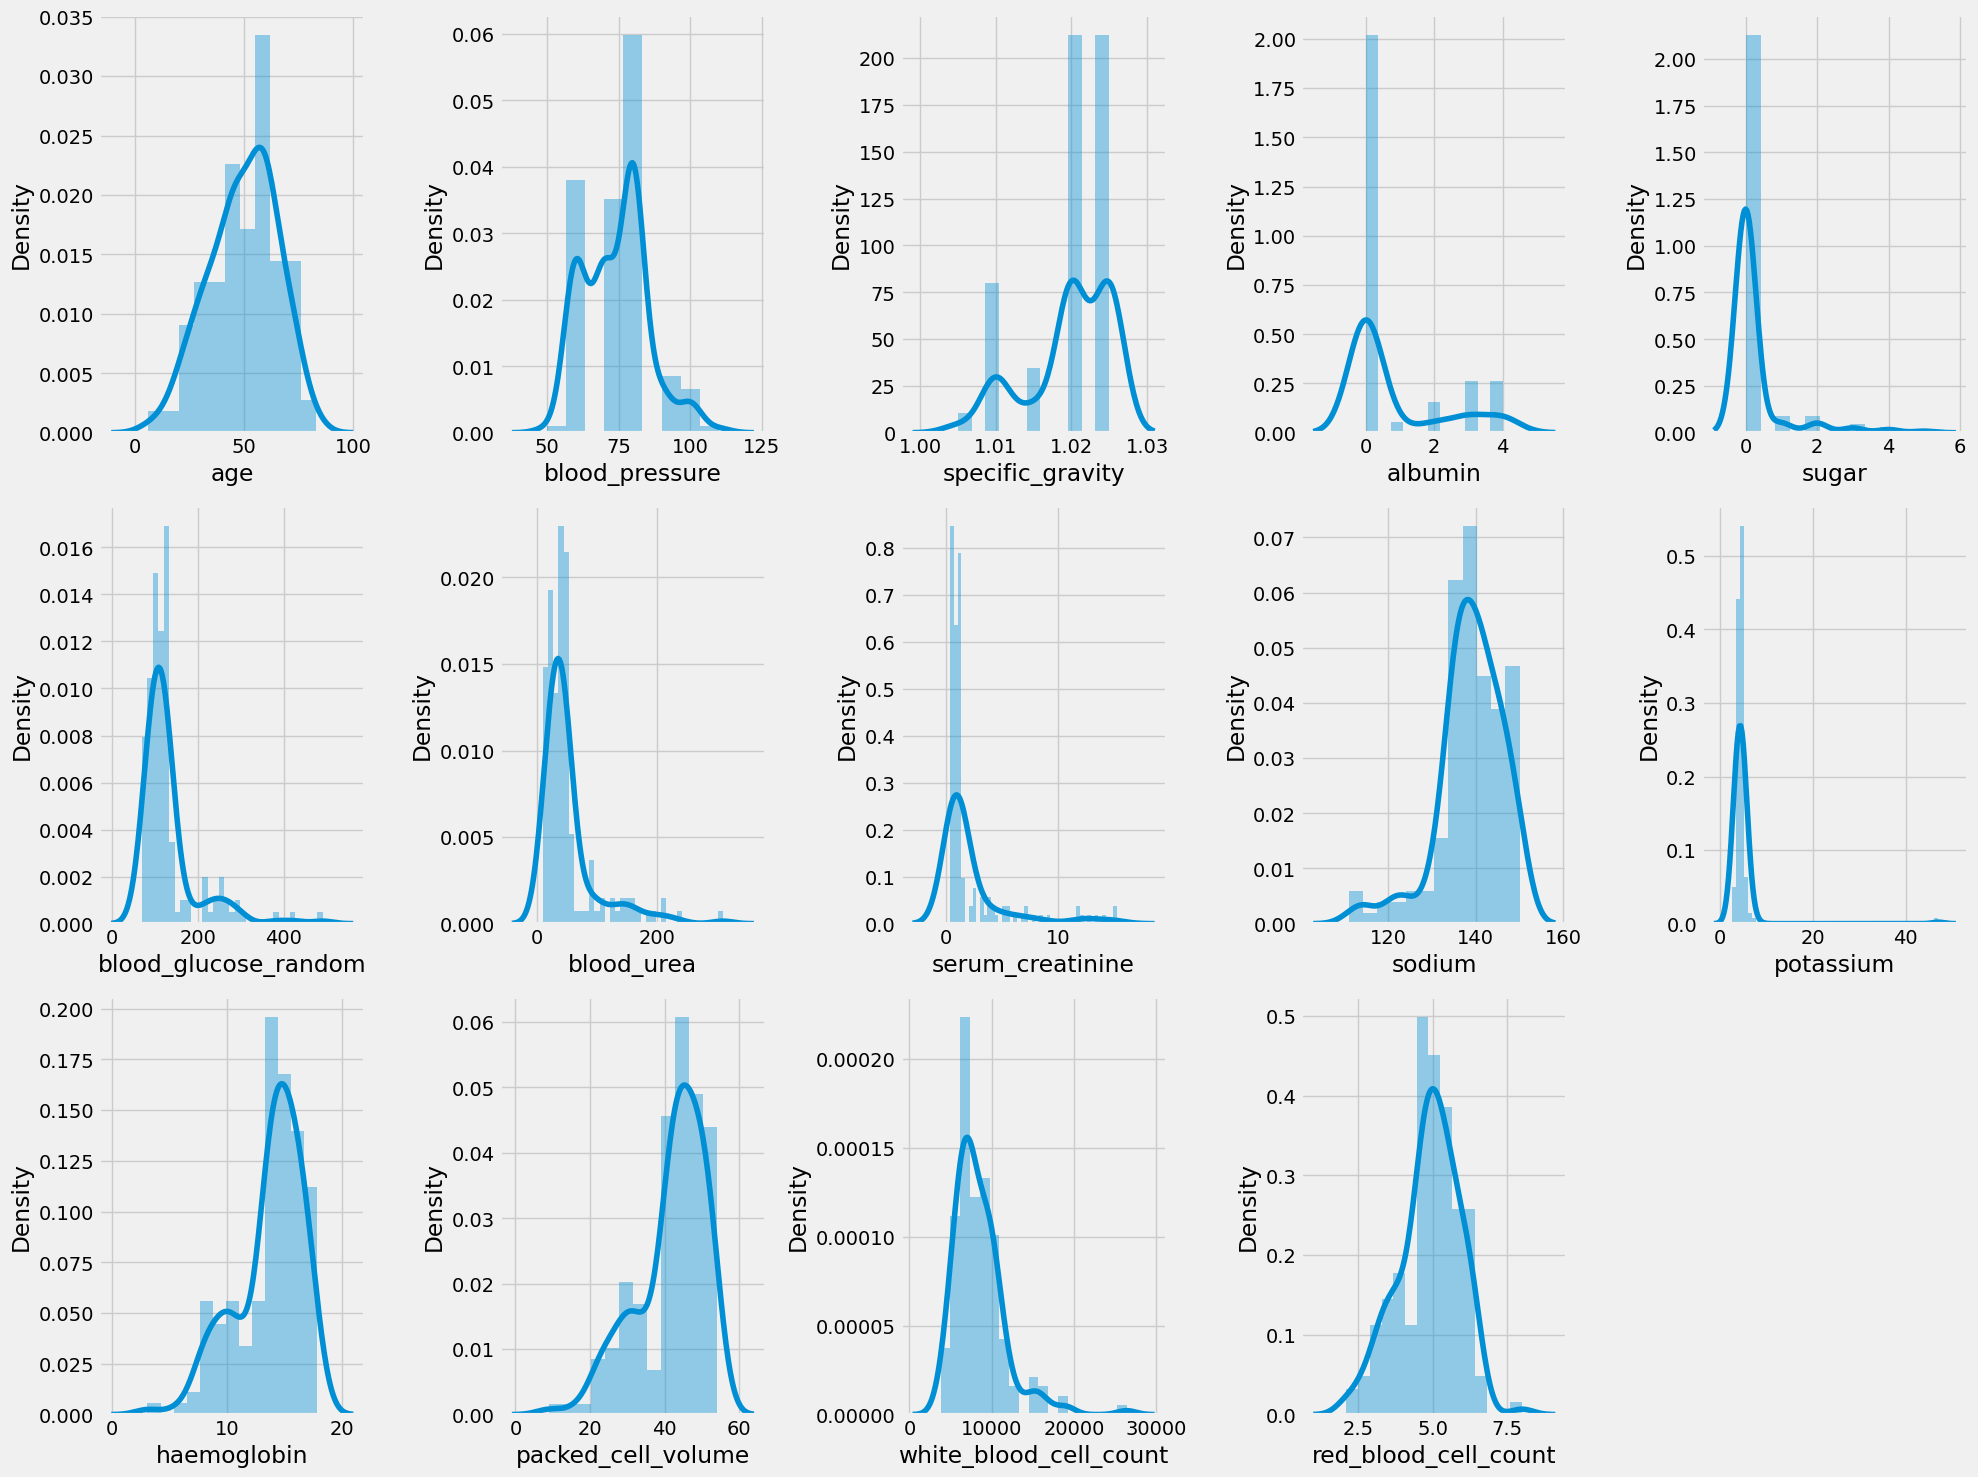

In [20]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

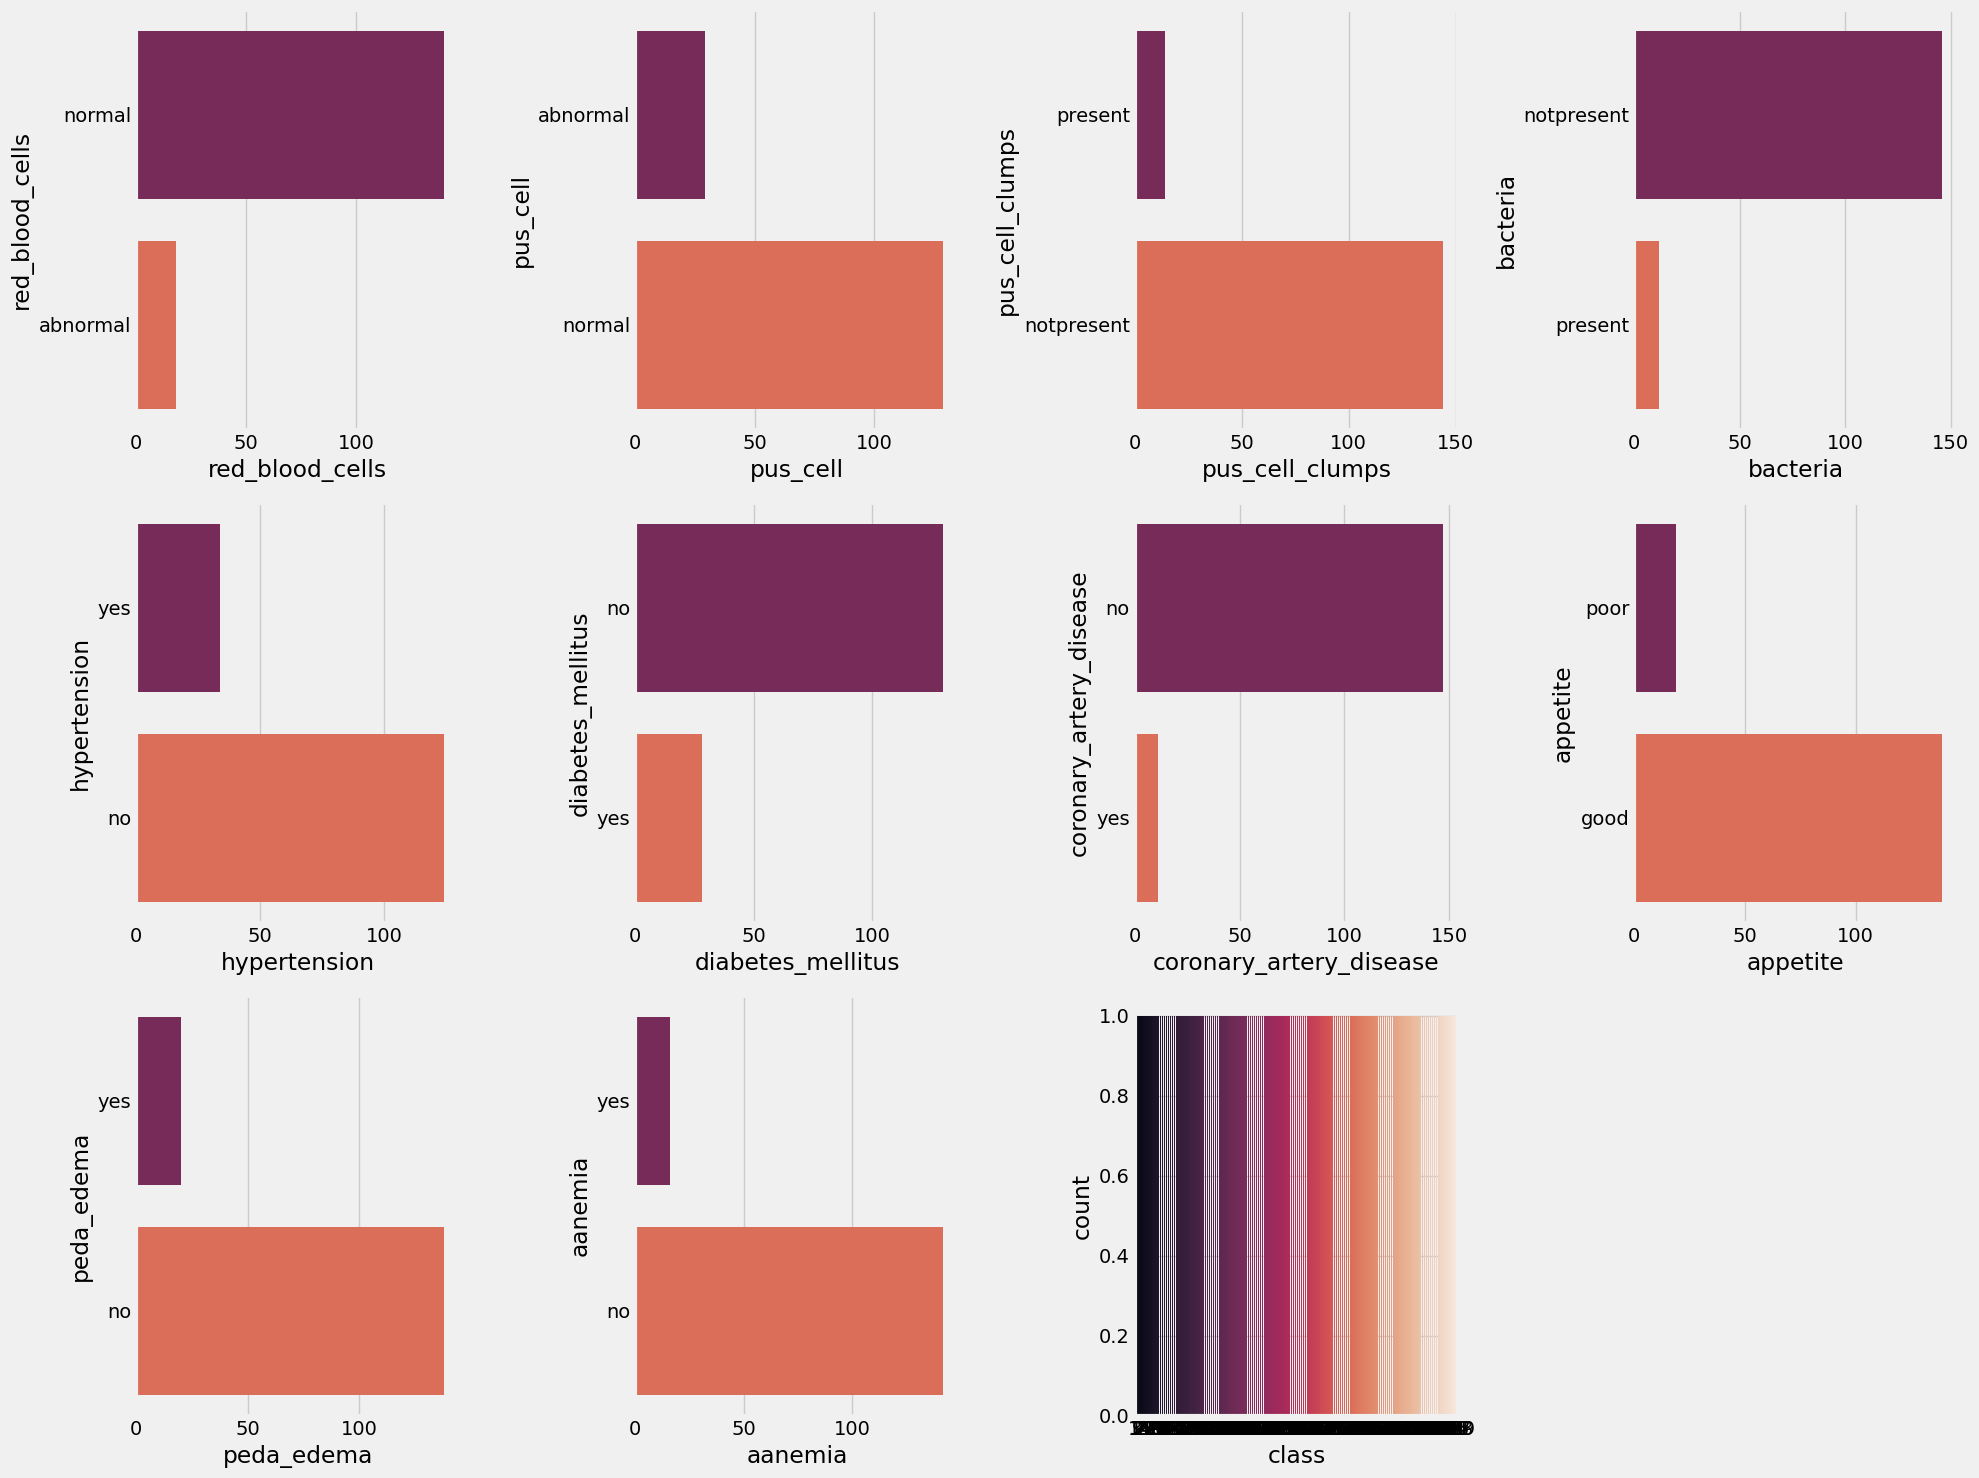

In [21]:
#Skewness is present in some of the columns.
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

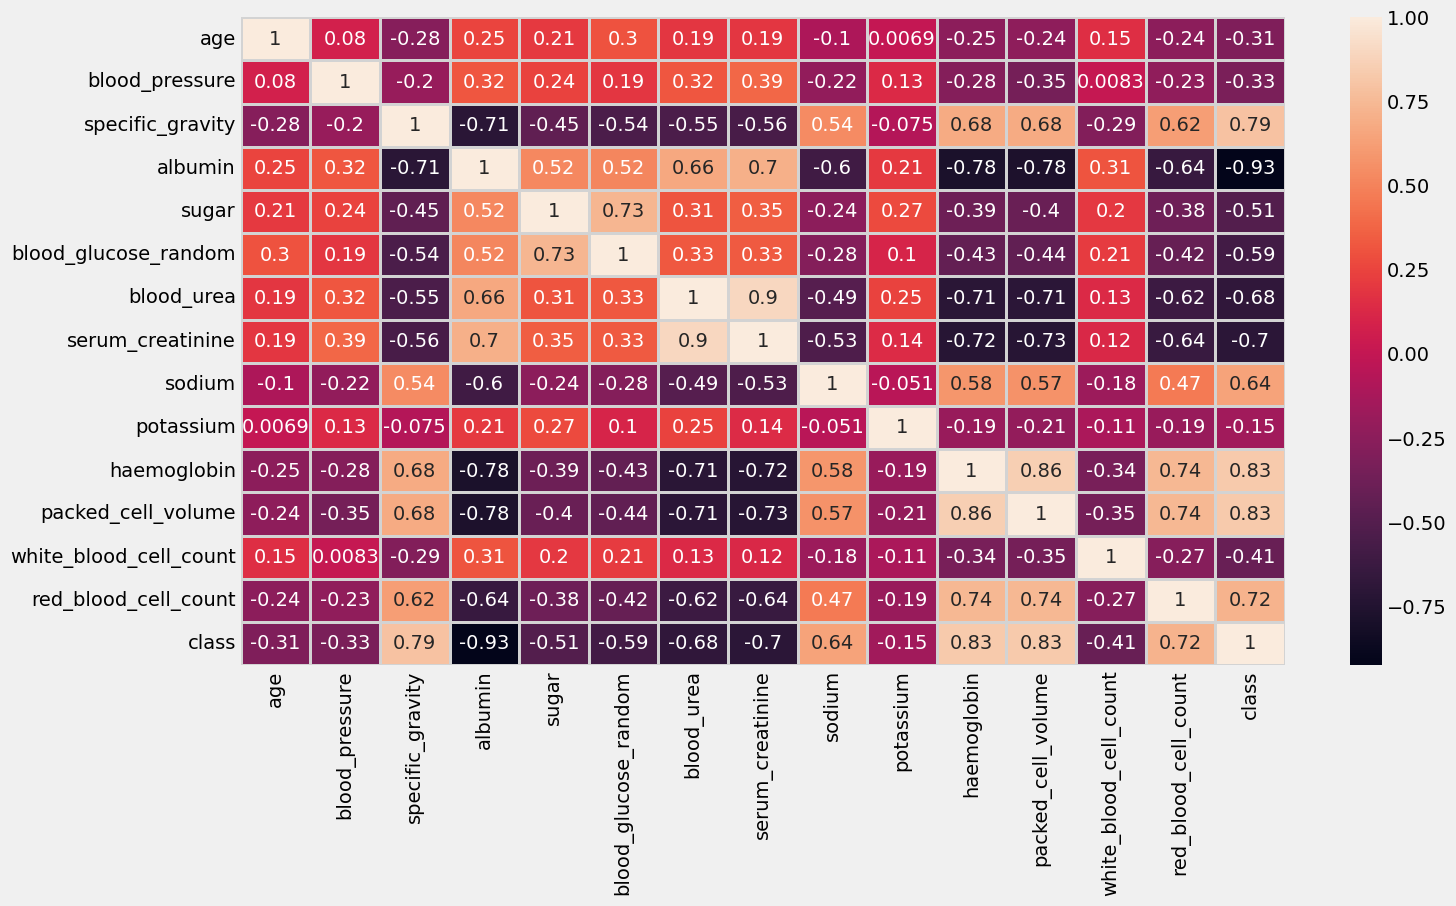

In [24]:
plt.figure(figsize=(15, 8))

numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, linewidths=2, linecolor='lightgrey')

plt.show()


In [25]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [26]:
def violin(col):
    fig = px.violin(df, y=col, x="class", color="class", box=True, template = 'plotly_dark')
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(df, hue="class", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()
    
def scatter(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color="class", template = 'plotly_dark')
    return fig.show()

In [27]:
violin('red_blood_cell_count')

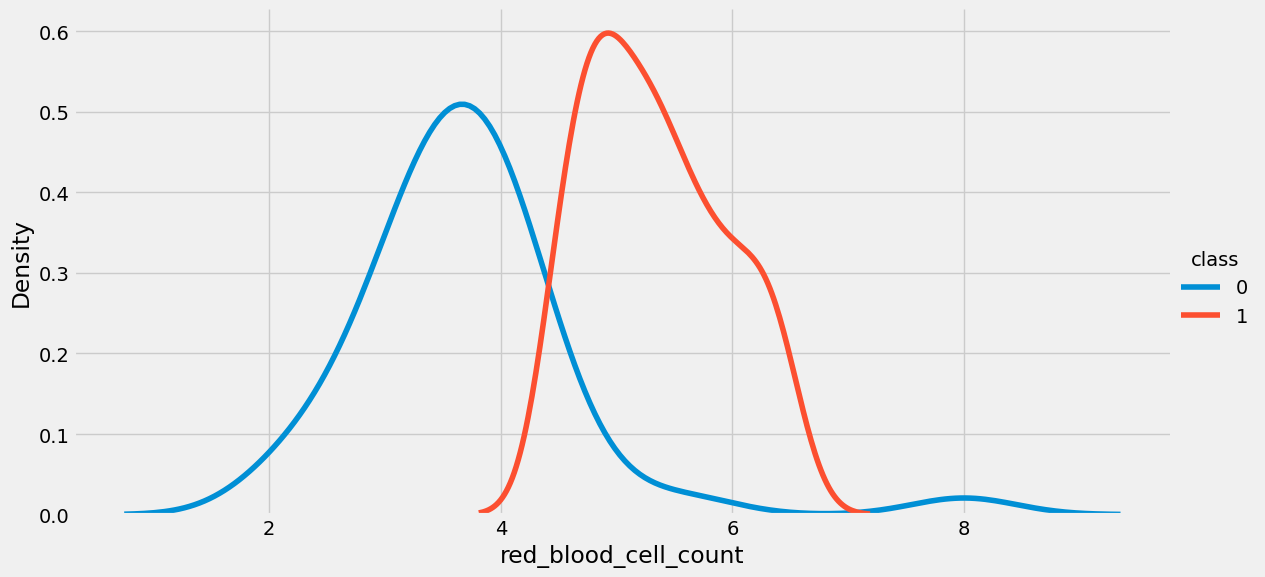

In [28]:
kde('red_blood_cell_count')

In [29]:
violin('white_blood_cell_count')

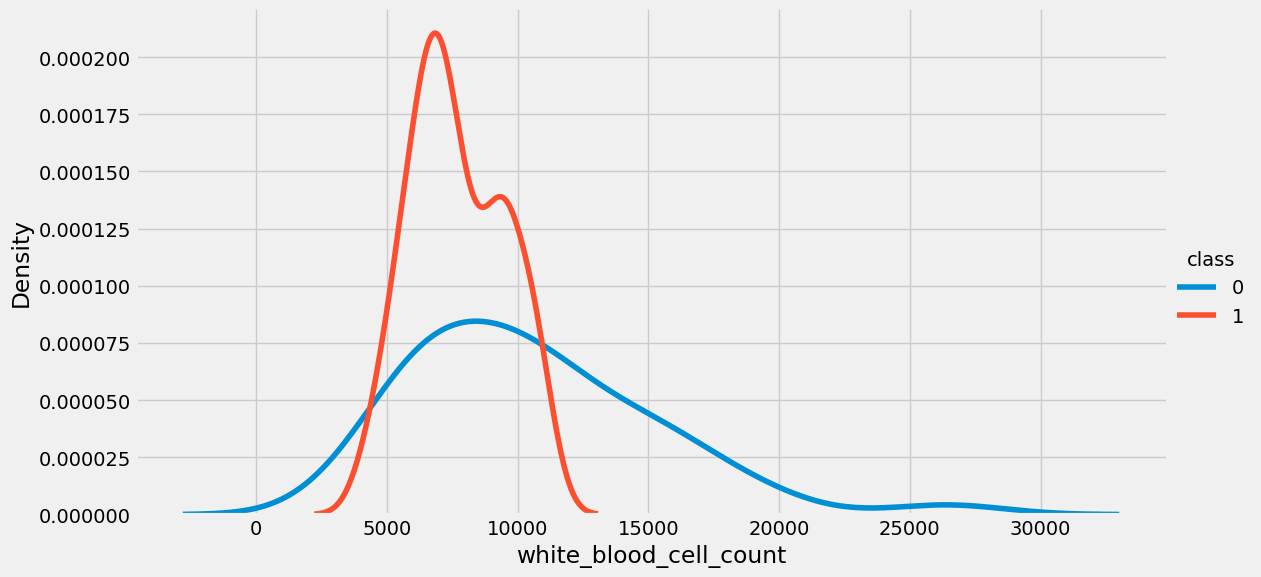

In [30]:
kde('white_blood_cell_count')

In [31]:
violin('packed_cell_volume')

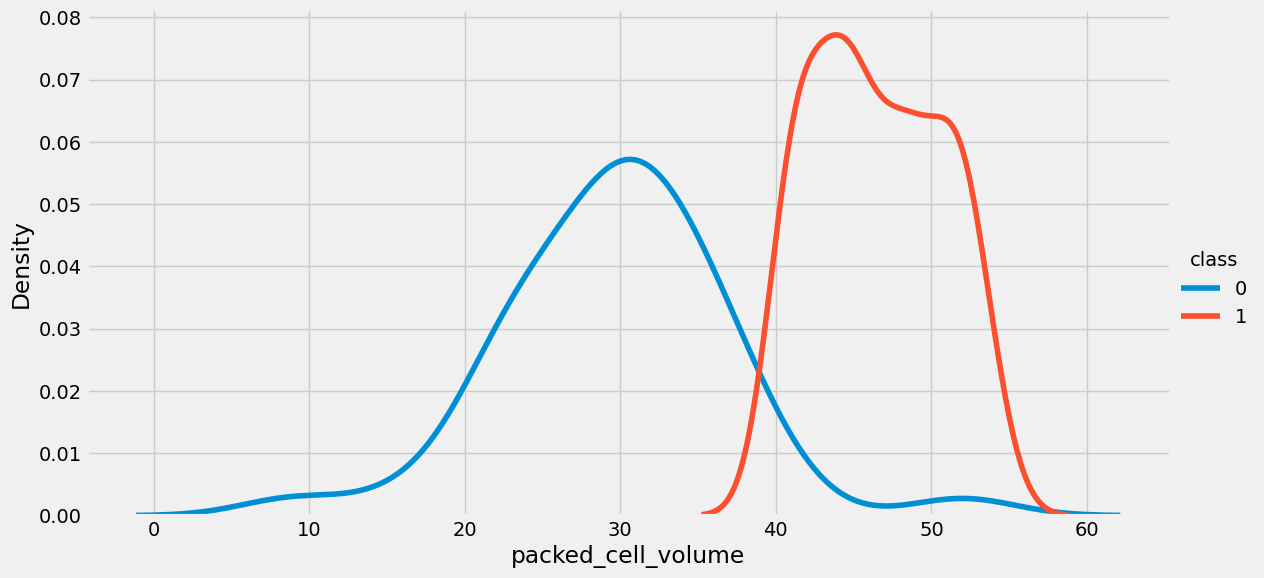

In [32]:
kde('packed_cell_volume')

In [33]:
violin('albumin')

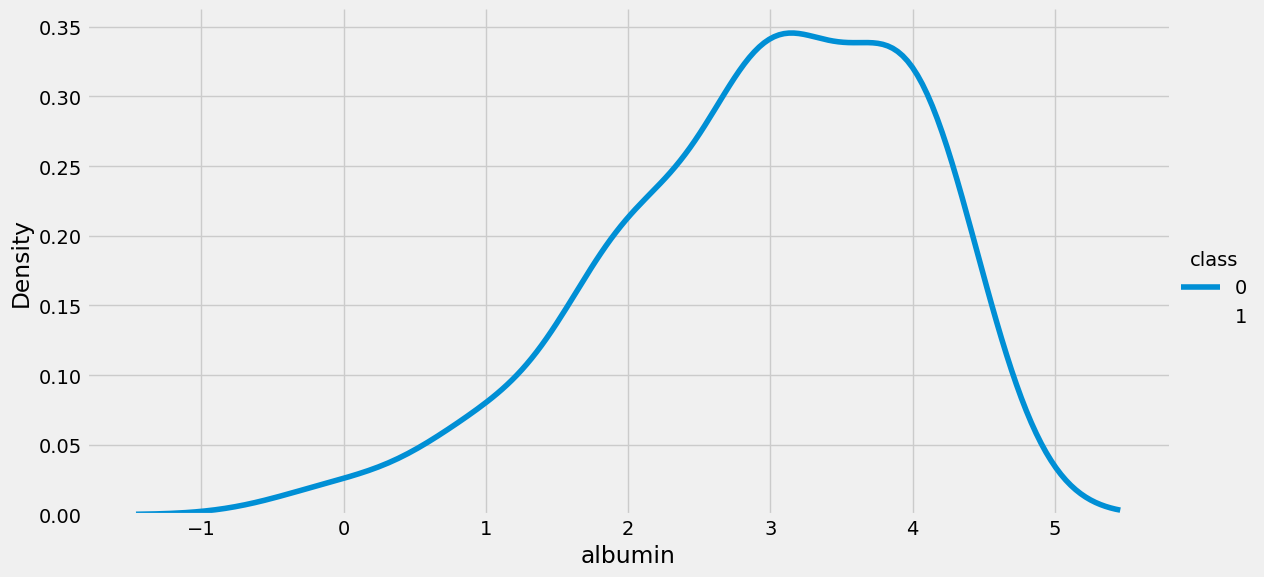

In [34]:
kde('albumin')

In [35]:
violin('blood_glucose_random')

In [36]:
violin('sodium')

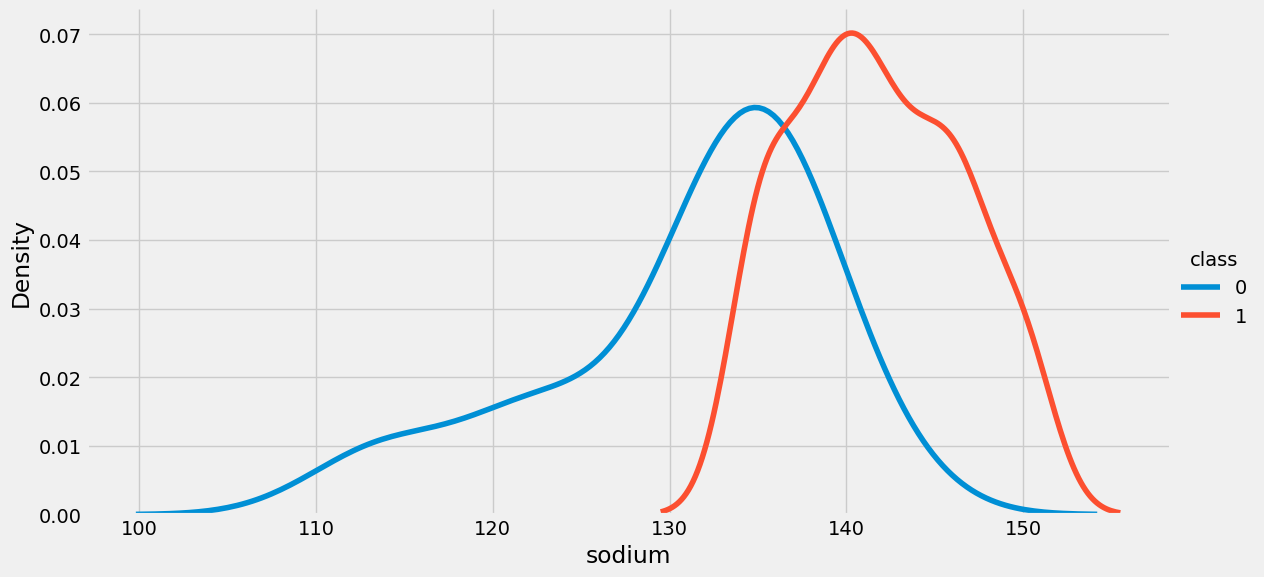

In [37]:
kde('sodium')

In [38]:
violin('blood_urea')

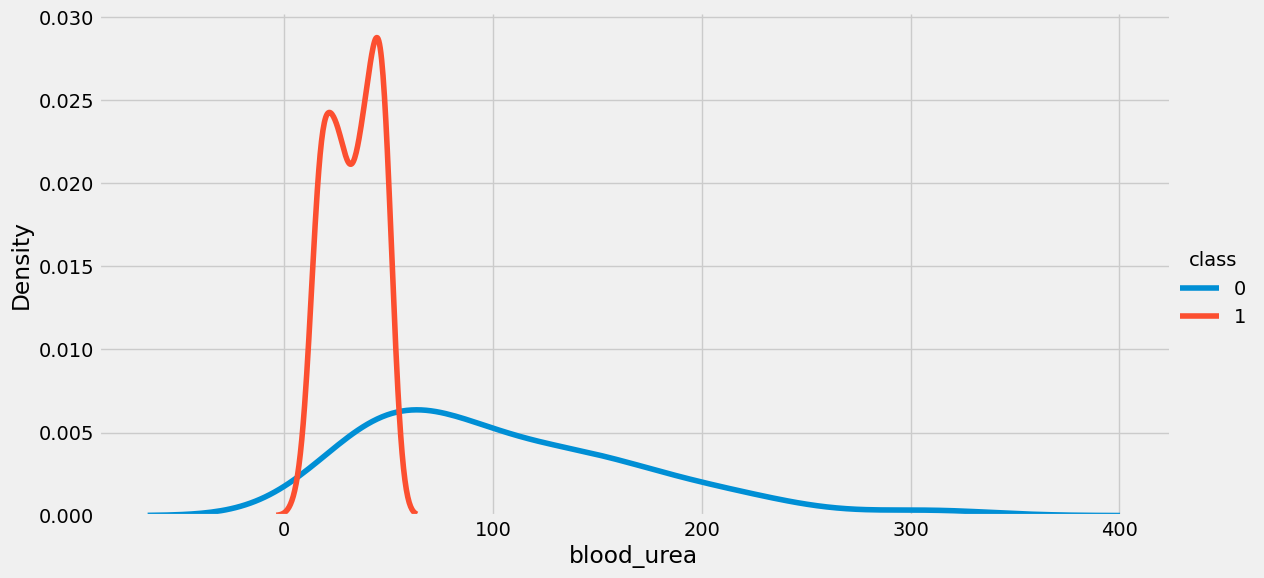

In [40]:
kde('blood_urea')

In [41]:
violin('specific_gravity')

In [42]:
scatter('haemoglobin', 'packed_cell_volume')

In [43]:
scatter('red_blood_cell_count', 'packed_cell_volume')

In [44]:

df.isna().sum().sort_values(ascending = False)

age                        0
potassium                  0
aanemia                    0
peda_edema                 0
appetite                   0
coronary_artery_disease    0
diabetes_mellitus          0
hypertension               0
red_blood_cell_count       0
white_blood_cell_count     0
packed_cell_volume         0
haemoglobin                0
sodium                     0
blood_pressure             0
serum_creatinine           0
blood_urea                 0
blood_glucose_random       0
bacteria                   0
pus_cell_clumps            0
pus_cell                   0
red_blood_cells            0
sugar                      0
albumin                    0
specific_gravity           0
class                      0
dtype: int64

In [45]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [46]:
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [47]:
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [48]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [49]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [50]:
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [51]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



In [52]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [53]:

ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

In [54]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.8181818181818182
Test Accuracy of KNN is 0.8541666666666666 

Confusion Matrix :- 
[[ 7  6]
 [ 1 34]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.88      0.54      0.67        13
           1       0.85      0.97      0.91        35

    accuracy                           0.85        48
   macro avg       0.86      0.75      0.79        48
weighted avg       0.86      0.85      0.84        48



In [56]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9583333333333334 

Confusion Matrix :- 
[[11  2]
 [ 0 35]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.95      1.00      0.97        35

    accuracy                           0.96        48
   macro avg       0.97      0.92      0.94        48
weighted avg       0.96      0.96      0.96        48



In [57]:
from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [58]:
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3, 'splitter': 'best'}
1.0


In [59]:
dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")


Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9791666666666666 

Confusion Matrix :- 
[[12  1]
 [ 0 35]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.97      1.00      0.99        35

    accuracy                           0.98        48
   macro avg       0.99      0.96      0.97        48
weighted avg       0.98      0.98      0.98        48



In [63]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(
    criterion='entropy',
    max_depth=11,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=3,
    n_estimators=130
)

rd_clf.fit(X_train, y_train)

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy: {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy: {rd_clf_acc}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report:\n{classification_report(y_test, rd_clf.predict(X_test))}")


Training Accuracy: 1.0
Test Accuracy: 1.0

Confusion Matrix:
[[13  0]
 [ 0 35]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        35

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [65]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(
    estimator=dtc,
    n_estimators=100,
    learning_rate=1.0
)

ada.fit(X_train, y_train)

# accuracy, confusion matrix, classification report
ada_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"Training Accuracy of AdaBoost Classifier: {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Test Accuracy of AdaBoost Classifier: {ada_acc}\n")

print(f"Confusion Matrix:\n{confusion_matrix(y_test, ada.predict(X_test))}\n")
print(f"Classification Report:\n{classification_report(y_test, ada.predict(X_test))}")


Training Accuracy of AdaBoost Classifier: 1.0
Test Accuracy of AdaBoost Classifier: 1.0

Confusion Matrix:
[[13  0]
 [ 0 35]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        35

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [66]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 0.9791666666666666 

Confusion Matrix :- 
[[12  1]
 [ 0 35]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.97      1.00      0.99        35

    accuracy                           0.98        48
   macro avg       0.99      0.96      0.97        48
weighted avg       0.98      0.98      0.98        48



In [67]:

sgb = GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)
sgb.fit(X_train, y_train)
# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")

Training Accuracy of Stochastic Gradient Boosting is 1.0
Test Accuracy of Stochastic Gradient Boosting is 0.9583333333333334 

Confusion Matrix :- 
[[11  2]
 [ 0 35]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.95      1.00      0.97        35

    accuracy                           0.96        48
   macro avg       0.97      0.92      0.94        48
weighted avg       0.96      0.96      0.96        48



In [69]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XgBoost is 1.0
Test Accuracy of XgBoost is 0.9791666666666666 

Confusion Matrix :- 
[[12  1]
 [ 0 35]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.97      1.00      0.99        35

    accuracy                           0.98        48
   macro avg       0.99      0.96      0.97        48
weighted avg       0.98      0.98      0.98        48



In [71]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train)

Learning rate set to 0.273911
0:	learn: 0.3815909	total: 97.5ms	remaining: 878ms
1:	learn: 0.2060431	total: 102ms	remaining: 406ms
2:	learn: 0.1346598	total: 105ms	remaining: 246ms
3:	learn: 0.0849968	total: 109ms	remaining: 164ms
4:	learn: 0.0553226	total: 115ms	remaining: 115ms
5:	learn: 0.0441136	total: 120ms	remaining: 79.9ms
6:	learn: 0.0359855	total: 124ms	remaining: 53.1ms
7:	learn: 0.0266873	total: 129ms	remaining: 32.3ms
8:	learn: 0.0236920	total: 133ms	remaining: 14.8ms
9:	learn: 0.0183414	total: 136ms	remaining: 0us


In [72]:
cat_acc = accuracy_score(y_test, cat.predict(X_test))

print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(y_train, cat.predict(X_train))}")
print(f"Test Accuracy of Cat Boost Classifier is {cat_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, cat.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, cat.predict(X_test))}")

Training Accuracy of Cat Boost Classifier is 1.0
Test Accuracy of Cat Boost Classifier is 0.9791666666666666 

Confusion Matrix :- 
[[12  1]
 [ 0 35]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.97      1.00      0.99        35

    accuracy                           0.98        48
   macro avg       0.99      0.96      0.97        48
weighted avg       0.98      0.98      0.98        48



In [73]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 1.0 

Confusion Matrix :- 
[[13  0]
 [ 0 35]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        35

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [75]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")

print(f"{confusion_matrix(y_test, lgbm.predict(X_test))}\n")
print(classification_report(y_test, lgbm.predict(X_test)))

[LightGBM] [Info] Number of positive: 80, number of negative: 30
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 281
[LightGBM] [Info] Number of data points in the train set: 110, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.727273 -> initscore=0.980829
[LightGBM] [Info] Start training from score 0.980829
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

In [76]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'Stochastic Gradient Boosting', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier'],
    'Score' : [knn_acc, dtc_acc, rd_clf_acc, ada_acc, gb_acc, sgb_acc, xgb_acc, cat_acc, etc_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Random Forest Classifier,1.000000
3,Ada Boost Classifier,1.000000
8,Extra Trees Classifier,1.000000
1,Decision Tree Classifier,0.979167
4,Gradient Boosting Classifier,0.979167
6,XgBoost,0.979167
7,Cat Boost,0.979167
5,Stochastic Gradient Boosting,0.958333
0,KNN,0.854167


In [77]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')

In [79]:
import pickle

# Save model
with open("best_model.pkl", "wb") as f:
    pickle.dump(lgbm, f)

# Load model later
with open("best_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)
